# Bias-Variance Tradeoff / Overfitting + underfitting With Trees

We've talked a lot about prediction risk (the expected amount of error we will make out of sample with a method) for the methods we've studied so far, so why not do it with trees as well?

Recall, bias dominates when a predictor lacks flexibility and predicts the same thing for similar points; whereas a variance dominated predictor will make widely different predictions for very similar data points.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 

from sklearn.datasets import make_gaussian_quantiles

# we have to be able to evaluate a model
from sklearn.metrics import accuracy_score 


Today, we'll use some simulated data: concentric spheres of classes, see plots and examples here:

http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html

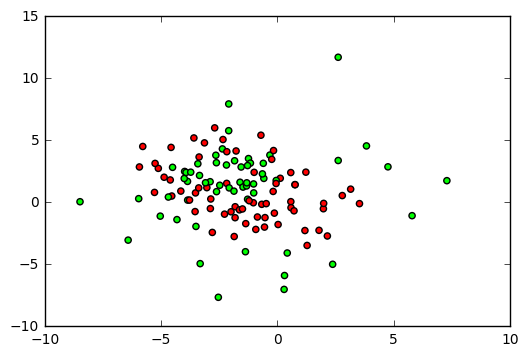

In [2]:
train_size = 125
n_per_blog = 500

X1, Y1 = make_gaussian_quantiles(cov=10.,
                                 n_samples=n_per_blog, n_features=2,
                                 n_classes=2, random_state=3)

X2, Y2 = make_gaussian_quantiles(mean=(-2, 2), cov=3.,
                                 n_samples=n_per_blog, n_features=2,
                                 n_classes=2, random_state=3)

X = np.concatenate((X1, X2))
Y = np.concatenate((Y1, -1 * Y2 + 1))

np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

train_data, train_labels = X[:train_size], Y[:train_size]
test_data, test_labels = X[train_size:], Y[train_size:]

cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.scatter(train_data[:, 0], 
            train_data[:, 1], 
            c=train_labels, 
            cmap=cmap_bold)

## Visualize a tree's predictions?

We'll need to visualize the predicitons a tree makes, given a certain depth. We can steal this visualize from knn visuals, e.g.:

http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

In [3]:
def TryThisMaxDepthThingOut(the_max_depth):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    h = .02  # step size in the mesh

    # we create an instance of Neighbours Classifier and fit the data.
    tree = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=the_max_depth)
    tree.fit(train_data, train_labels)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])

    test_pred = tree.predict(test_data)

    test_score = accuracy_score(test_labels, test_pred) 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(train_data[:, 0], 
                train_data[:, 1], 
                c=train_labels, 
                cmap=cmap_bold,
                alpha = 0.9)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class tree classification (max_depth = %i ; test_score = %s)"
              % (the_max_depth, np.round(test_score, 2)))

    plt.show()

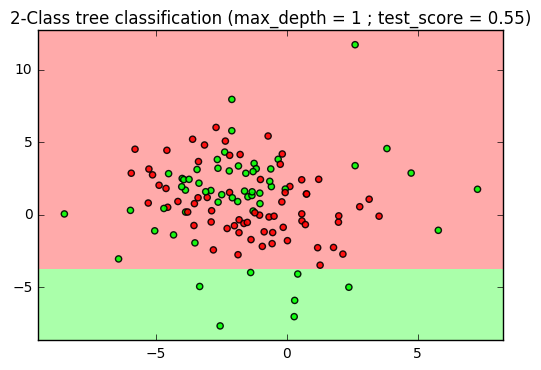

In [4]:

TryThisMaxDepthThingOut(1)

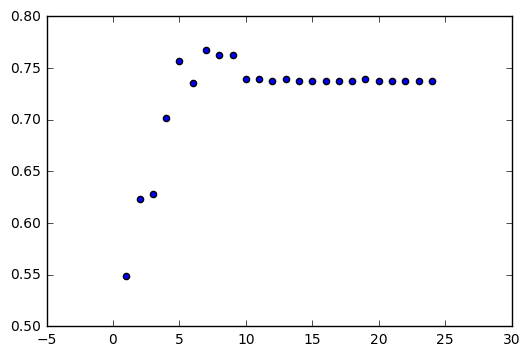

In [5]:
the_max_depth_range = 25
step_size = 1

depth_range = range(1, the_max_depth_range, step_size)

test_scores = []

for the_max_depth in depth_range:
    tree = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=the_max_depth)
    tree.fit(train_data, train_labels)
    
    test_pred = tree.predict(test_data)
    test_score = accuracy_score(test_labels, test_pred) 
    
    test_scores.append(test_score)

plt.scatter(depth_range, test_scores)